In [56]:
import sys
import subprocess

python_path = sys.executable
subprocess.call([python_path,'-m','pip','install','sounddevice'])
subprocess.call([python_path,'-m','pip','install','soundfile'])
subprocess.call([python_path,'-m','pip','install','scipy'])

0

In [57]:
import sounddevice as sd
import soundfile as sf

#read the wav file
data, fs = sf.read('./Sounds/Ex3_sound2.wav')

#play the audio
sd.play(data, fs)

#wait until the audio is done playing
sd.wait()

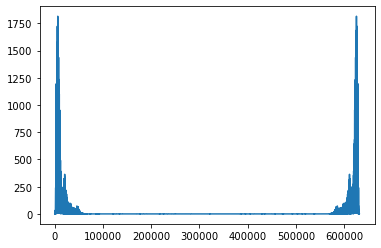

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# FFT of the audio signal
fft_data = np.fft.fft(data)

# Plot the audio spectrum
plt.plot(np.abs(fft_data))
plt.show()

A spectrum analysis shows that the high frequency range has nothing hidden

Analyse: Ex3_sound3.wav

In [11]:
import sounddevice as sd
import soundfile as sf

#read the wav file
data, fs = sf.read('./Sounds/Ex3_sound3.wav')

#play the audio
sd.play(data, fs)

#wait until the audio is done playing
sd.wait()

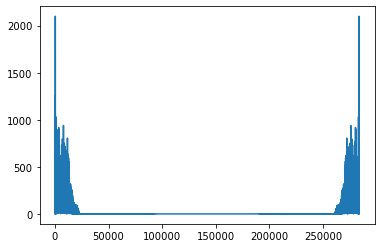

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# FFT of the audio signal
fft_data = np.fft.fft(data)

# Plot the audio spectrum
plt.plot(np.abs(fft_data))
plt.show()

A spectrum analysis shows that the high frequency range has nothing hidden

Analyse: Ex3_sound4.wav

In [30]:
import sounddevice as sd
import soundfile as sf

#read the wav file
data, fs = sf.read('./Sounds/Ex3_sound4.wav')

#play the audio
sd.play(data, fs)

#wait until the audio is done playing
sd.wait()

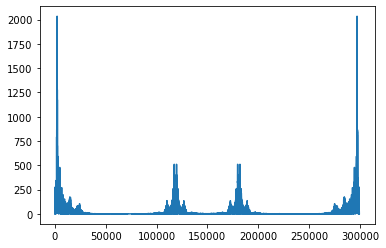

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# FFT of the audio signal
fft_data = np.fft.fft(data)

# Plot the audio spectrum
plt.plot(np.abs(fft_data))
plt.show()

The 19 KHz band contains some information. By filtering out lower frequencies, that can be seen more clearly

In [49]:
import numpy as np
from scipy.io.wavfile import read
from scipy.signal import butter, lfilter
import sounddevice as sd

# Read the .wav file
fs, data = read('./Sounds/Ex3_sound4.wav')
duration = data.shape[0]/fs

We are now going to reverse the amplitude modulation in order to extract the signal. The carrier signal must be centered at 19KHz in order to achieve this

In [50]:
#generating the carrier signal
car_freq = 19000
car_time = np.linspace(0, duration, int(fs * duration))
car_wave = np.sin(2 * np.pi * car_freq * car_time)
mod_signal = np.multiply(data, car_wave)


Applying modulation again can produce the demodulated signal.

In [51]:
#play the modulated signal
sd.play(mod_signal, fs)

In [52]:
demod_signal = np.multiply(mod_signal, car_wave)
# play the demodulated signal
sd.play(demod_signal, fs)

# Apply FFT on demodulated signal
demod_fft = np.fft.fft(demod_signal)
# Get the real part of the FFT
demod_fft_real = np.real(demod_fft)


It is now possible to separate the signal below 5kHz by using a lowpass filter

In [53]:
#define the cutoff frequency
cutoff_freq = 5000
#design the lowpass filter
nyquist_freq = 0.5 * fs
normal_cutoff = cutoff_freq / nyquist_freq
b, a = butter(10, normal_cutoff, btype='low', analog=False)

#apply the lowpass filter to the audio signal
lowpass_signal = lfilter(b, a, demod_signal)

In [54]:
#play the lowpass filtered signal
sd.play(lowpass_signal, fs)

In [55]:
#convert spectrum to time domain signal
hid_wave = np.fft.irfft(demod_fft_real)

#play the audio
sd.play(hid_wave, fs)

Hidden message: "One eight nine one"